# Dataset information



# Import Modules

In [123]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [124]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
#removing the Id column as it is not necessary
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
#Showing the statistics of the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
#Showing the basic information of the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [129]:
#Displaying the number of samples for each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Exploratory Data Analysis

Using the Seaborn module imported I will:

- Display the individual datasets using Histograms with Seaborn.

- Compare the datsets in correlation to eachother with Scatterplots.

Text(0.5, 1.0, 'Sepal Length')

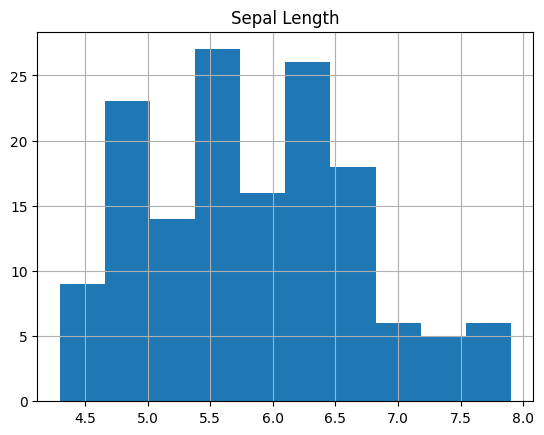

In [144]:
df['SepalLengthCm'].hist()
plt.title('Sepal Length')



Text(0.5, 1.0, 'Sepal Width')

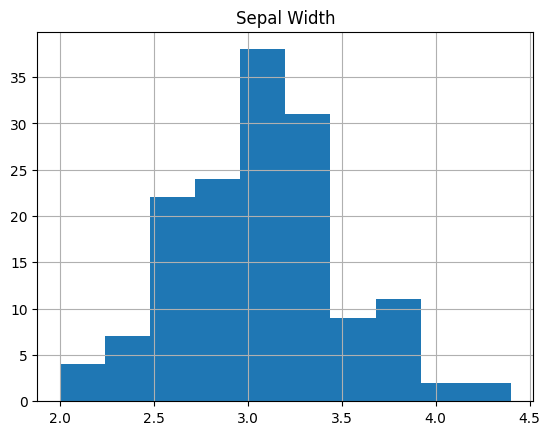

In [145]:
df['SepalWidthCm'].hist()
plt.title('Sepal Width')

This would appear to be a normal distribution, similar to a bellcurve.

Text(0.5, 1.0, 'Petal Length')

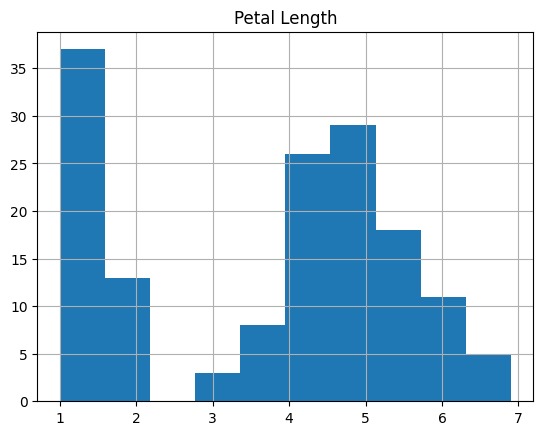

In [146]:
df['PetalLengthCm'].hist()
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Width')

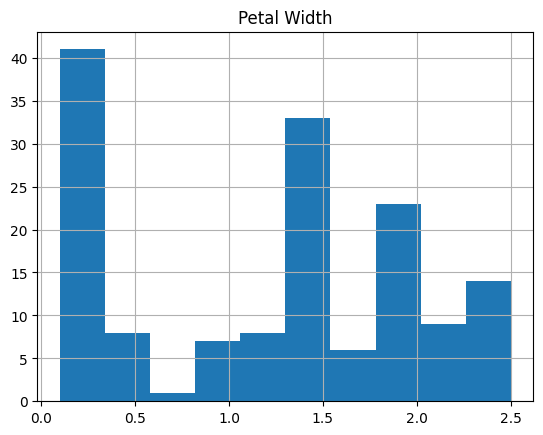

In [147]:
df['PetalWidthCm'].hist()
plt.title('Petal Width')

In [134]:
# preparing to compare via scatterplot
colors = ['red', 'green', 'cyan']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

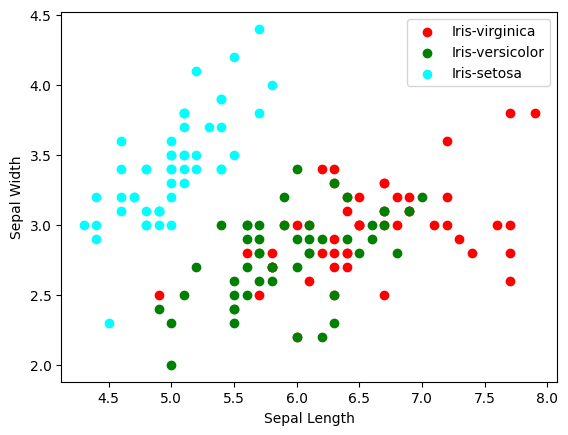

In [135]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

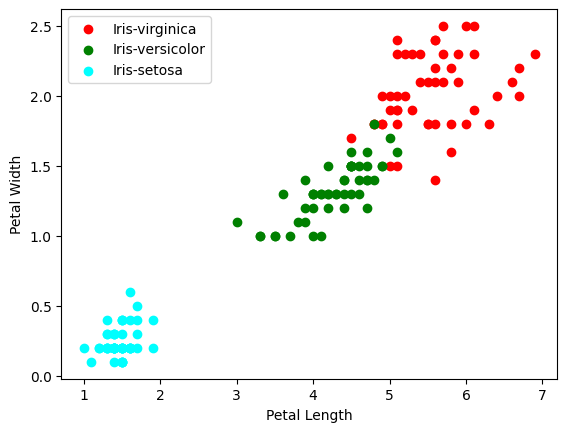

In [136]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

There is a notable difference in species here.

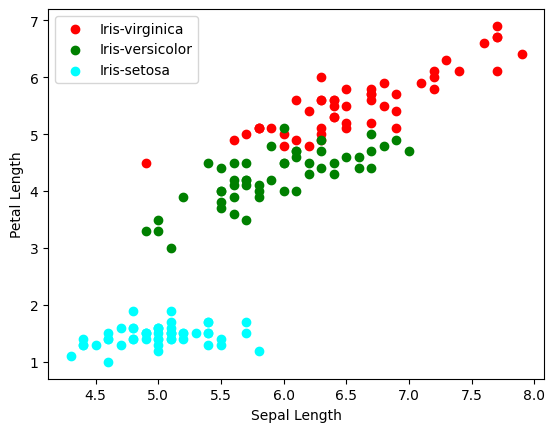

In [137]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

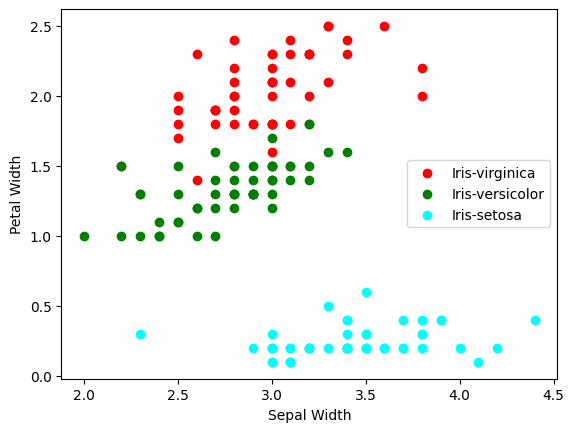

In [138]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

In [139]:
#I had been struggling to run the "df.corr()" code.
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html

# Convert non-numeric values to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Customize formatting and print correlation matrix
print(correlation_matrix.to_string(float_format="{:.2f}".format))

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
SepalLengthCm           1.00         -0.11           0.87          0.82      NaN
SepalWidthCm           -0.11          1.00          -0.42         -0.36      NaN
PetalLengthCm           0.87         -0.42           1.00          0.96      NaN
PetalWidthCm            0.82         -0.36           0.96          1.00      NaN
Species                  NaN           NaN            NaN           NaN      NaN


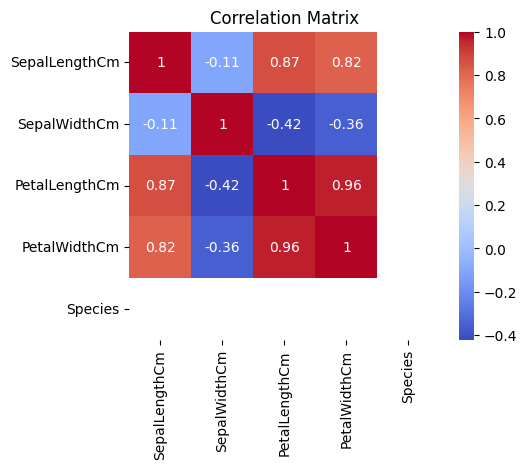

In [140]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()